In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Helper Functions

#### read hichip-inferred peaks files

In [2]:
def read_peak_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                info = line.strip().split()
                peak_info = info[0:11]
                peak_data[count] = peak_info
                count = count + 1
    return(peak_data)

#### read chip-seq peaks files

In [3]:
def read_chipseq_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                info = line.strip().split()
                peak_info = info[0:3]
                peak_data[count] = peak_info
                count = count + 1
    return(peak_data)

In [4]:
def get_chipseq_path(samplesheet, sample_name):
    path=''
    with open(samplesheet) as fr:
        for line in fr:
            if sample_name in line:
                info = line.strip().split()
                path = info[4]
    return(path) 

#### generate pandas dataframe 

In [5]:
def generate_df():
    data = []
    glob_str = 'results/hicpro/*/hic_results'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[2]
        sample_info = []
        sample_info.append(sample_name)
        
        ## HiChIP-Peaks peaks
        hichip_peaks_path='results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
        if os.path.exists(hichip_peaks_path):
            peak_info = read_peak_files(hichip_peaks_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        ## FitHiChIP peaks
        fithichip_path='results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
        
        ## Chip-seq peaks
        chip_path=get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        if os.path.exists(chip_path):
            peak_info = read_chipseq_files(chip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
            sample_info.append(os.path.basename(chip_path))
        else:
            sample_info.append(0)
            sample_info.append(0)
            sample_info.append('N/A')
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

# Generate Pandas Dataframe

In [6]:
df = generate_df()

In [7]:
df.columns = ["sample_name", "num_peaks_hichip_peaks","avg_peak_size_hichip_peaks", "num_peaks_fithichip","avg_peak_size_fithichip", "num_peaks_chipseq","avg_peak_size_chipseq", "chipseq_path"]
df = df.sort_values(by=["sample_name"], ascending=True).reset_index(drop=True)
df

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,968,18837.628099,29430,174.444852,19491,9279.021087,FINAL_IDR_Peaks_FDR0.05.txt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,1801,29690.376458,73184,187.952298,21727,4880.460901,FINAL_IDR_Peaks_FDR0.05.txt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,43,21189.976744,987,183.697062,21267,8636.245263,FINAL_IDR_Peaks_FDR0.05.txt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,2661,1281.321308,11489,265.430151,0,0.000000,N/A
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,3468,1323.914360,10428,255.292386,0,0.000000,N/A
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,823,1086.366950,7761,265.823734,0,0.000000,N/A
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,2205,1375.680726,23228,247.107327,0,0.000000,N/A
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,49,2554.061224,9018,207.311377,0,0.000000,N/A
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,46,1515.434783,27484,216.063164,0,0.000000,N/A
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,29585,2240.566571,60295,386.202189,0,0.000000,N/A


In [8]:
has_chipseq = df.loc[df['num_peaks_chipseq'] != 0]
has_inferred = has_chipseq.loc[df['num_peaks_fithichip'] != 0]
low = ((has_inferred.num_peaks_hichip_peaks < 5000) | (has_inferred.num_peaks_fithichip < 5000) | (has_inferred.num_peaks_chipseq < 5000))
#has_inferred[low].drop(columns=['avg_peak_size_hichip_peaks', 'avg_peak_size_fithichip', 'avg_peak_size_chipseq']).reset_index(drop=True)

# Generate Sample-Specific Plots

#### peak sizes

In [52]:
def get_outliers(ps_df):
    
    Q1 = ps_df['peak_sizes_bp'].quantile(0.25)
    Q3 = ps_df['peak_sizes_bp'].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("Outliers Report")
    print("IQR:", IQR)
    
    outliers_low = ps_df.peak_sizes_bp < lower_lim
    outliers_high = ps_df.peak_sizes_bp > upper_lim
    outliers_low_df = ps_df.loc[outliers_low,:]
    outliers_high_df = ps_df.loc[outliers_high,:]
    print("num_outliers_low:", len(outliers_low_df))
    print("num_outliers_high:", len(outliers_high_df))
    print("percent_total_peaks_that_are_outliers:", round(((len(outliers_high_df) + len(outliers_low_df)) / len(ps_df) * 100), 2), "%")
    
    ps_df_no_outliers = ps_df[~(outliers_low | outliers_high)]
    
    return ps_df_no_outliers

In [74]:
def gen_peak_sizes_plot(sample_name, peak_type):
    
    if peak_type == "FitHiChIP": 
        peaks_path = 'results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
    if peak_type == "HiChIP_Peaks":
        peaks_path = 'results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
    if peak_type == "ChIP_Seq":
        peaks_path = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        
    if os.path.exists(peaks_path):
        if peak_type == "FithiChIP" or peak_type == "HiChIP_Peaks": 
            peak_info = read_peak_files(peaks_path)    
        else:
            peak_info = read_chipseq_files(peaks_path)
            
        peak_sizes = []
        for peak in peak_info.items():
            peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
        ps_df = pd.DataFrame(peak_sizes)
        ps_df.columns = ['peak_sizes_bp']
        
    print("Peak Sizes Report (before outliers dropped)")
    print(ps_df.describe())
    print()
    
    ps_df_no_outliers = get_outliers(ps_df)
    
    sns.set(rc = {'figure.figsize':(25,8)})
    sns.set_theme(style="whitegrid")
    font1 = {'color':'black','size':20}
    font2 = {'color':'black','size':15}
    plt.title(peak_type + " Peak Sizes Distribution: " + sample_name + " (Outliers Dropped)", fontdict = font1)
    plt.xlabel("Peak Size (bp)", fontdict = font2)
    plt.ylabel("Number of Samples", fontdict = font2)

    ps_plot = sns.histplot(data=ps_df_no_outliers, bins=100, x="peak_sizes_bp", color='#fa8072')

    return ps_plot

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count   51221.000000
mean     3132.609535
std      3013.077518
min         7.000000
25%      1467.000000
50%      2421.000000
75%      3813.000000
max     78049.000000

Outliers Report
IQR: 2346.0
num_outliers_low: 0
num_outliers_high: 3141
percent_total_peaks_that_are_outliers: 6.13 %


<AxesSubplot:title={'center':'HiChIP_Peaks Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

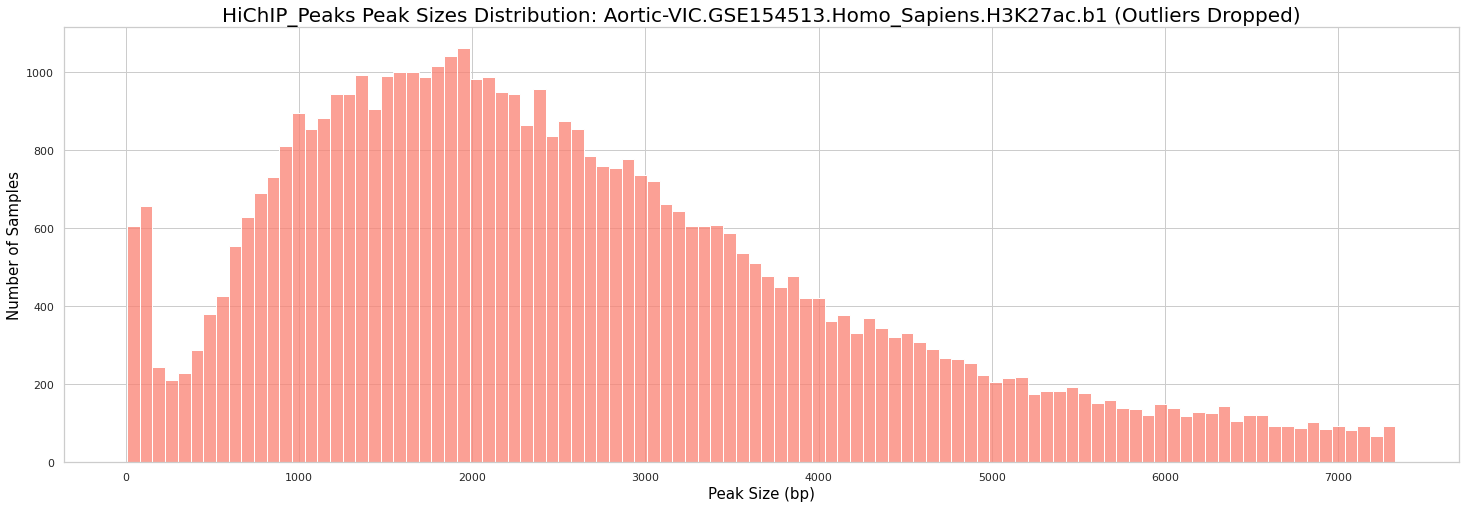

In [78]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'HiChIP_Peaks')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  210112.000000
mean      388.569696
std       341.728160
min       147.000000
25%       179.000000
50%       250.000000
75%       440.000000
max      3959.000000

Outliers Report
IQR: 261.0
num_outliers_low: 0
num_outliers_high: 21286
percent_total_peaks_that_are_outliers: 10.13 %


<AxesSubplot:title={'center':'FitHiChIP Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

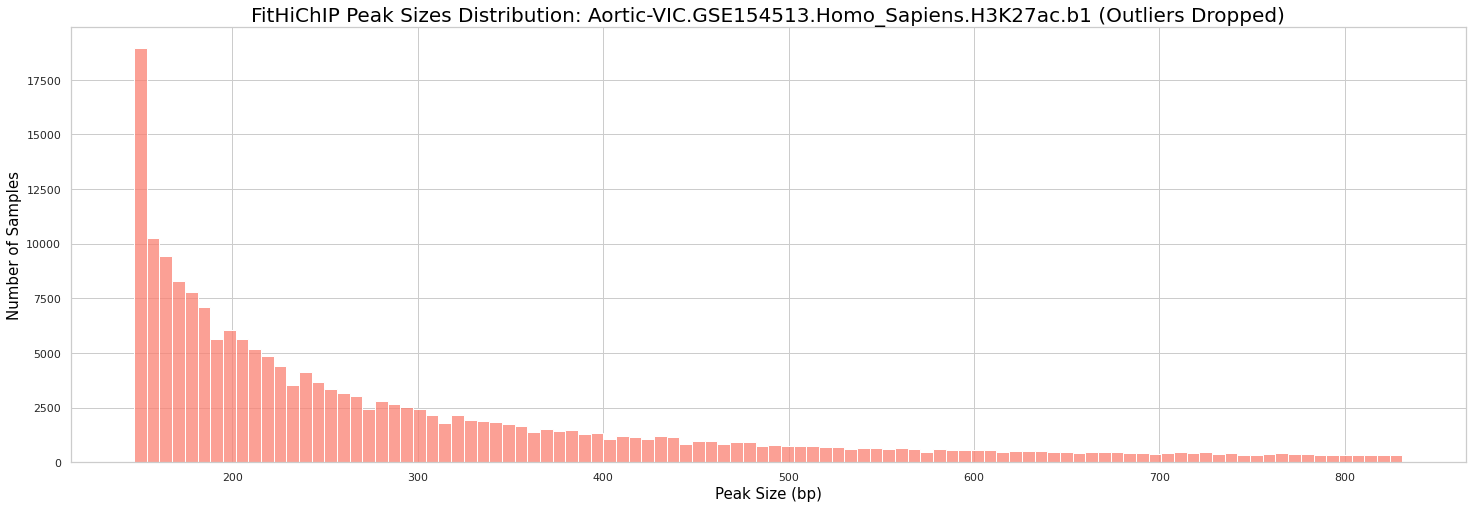

In [79]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'FitHiChIP')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  163779.000000
mean      657.534684
std       753.876251
min       200.000000
25%       252.000000
50%       384.000000
75%       726.000000
max     26766.000000

Outliers Report
IQR: 474.0
num_outliers_low: 0
num_outliers_high: 16518
percent_total_peaks_that_are_outliers: 10.09 %


<AxesSubplot:title={'center':'ChIP_Seq Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

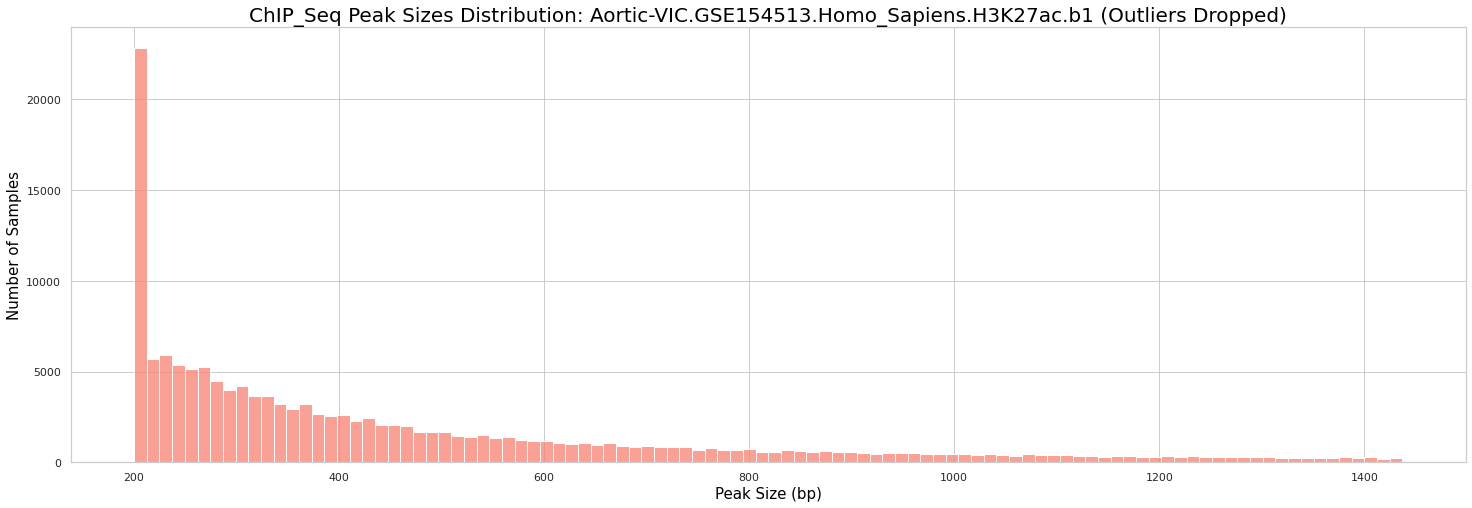

In [80]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'ChIP_Seq')

#### overlaps, percent recall

In [106]:
def read_overlaps(file):
    overlaps = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):     
                info = line.strip().split()
                overlaps = overlaps + 1
    return overlaps

In [107]:
def create_overlaps_df():
    data = []
    sample_files = glob.glob('results/peaks/overlaps/no_slop_recall/*')
    samples = []
    for sample in sample_files:
        s = sample.split('/')[4].split('.overlaps')[0]
        if s not in samples:
            samples.append(s)
    
    for s in samples:
        sample_name = s
        sample_info = []
        sample_info.append(sample_name)
        chipseq_file = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        
        ## read overlaps with hp file
        hp_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.hp.nodups.txt'.format(sn = sample_name)
        if os.path.exists(hp_file):
            num_overlaps = read_overlaps(hp_file)
            num_chipseq_peaks = read_overlaps(chipseq_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        ## read overlaps with f file
        f_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.f.nodups.txt'.format(sn = sample_name)
        if os.path.exists(f_file):
            num_overlaps = read_overlaps(f_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

In [108]:
o_df = create_overlaps_df()

In [135]:
o_df.columns = ['sample_name', 'num_csp_w_hp_overlap', 'num_csp', '%_recall_hp_csp', 'num_csp_w_f_overlap', 'num_csp', '%_recall_f_csp']
o_df = o_df.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
o_df

,sample_name,num_csp_w_hp_overlap,num_csp,%_recall_hp_csp,num_csp_w_f_overlap,num_csp,%_recall_f_csp
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,1394,19491,7.152019,1349,19491,6.921143
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,4100,21727,18.870530,5492,21727,25.277305
2,293T.GSE128106.Homo_Sapiens.YY1.b1,110,21267,0.517233,386,21267,1.815019
3,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,96306,163779,58.802411,75469,163779,46.079778
4,BC1.GSE136090.Homo_Sapiens.H3K27ac.b1,210,13670,1.536211,893,13670,6.532553
5,BC3.GSE136090.Homo_Sapiens.H3K27ac.b1,20,12866,0.155448,484,12866,3.761853
6,BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1,4781,18843,25.372817,8229,18843,43.671390
7,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,27323,130219,20.982345,22617,130219,17.368433
8,COLO320-DM.GSE159985.Homo_Sapiens.H3K27ac.b1,6380,15865,40.214308,6230,15865,39.268831
9,CTL.GSE117888.Homo_Sapiens.H3K27ac.b1,229,153727,0.148965,1178,153727,0.766293


In [137]:
o_df.to_excel("results/peaks/overlaps/no_slop_recall/percent_recall.xlsx", sheet_name='percent_recall_chipseq')

<AxesSubplot:xlabel='%_recall_hp_csp', ylabel='Count'>

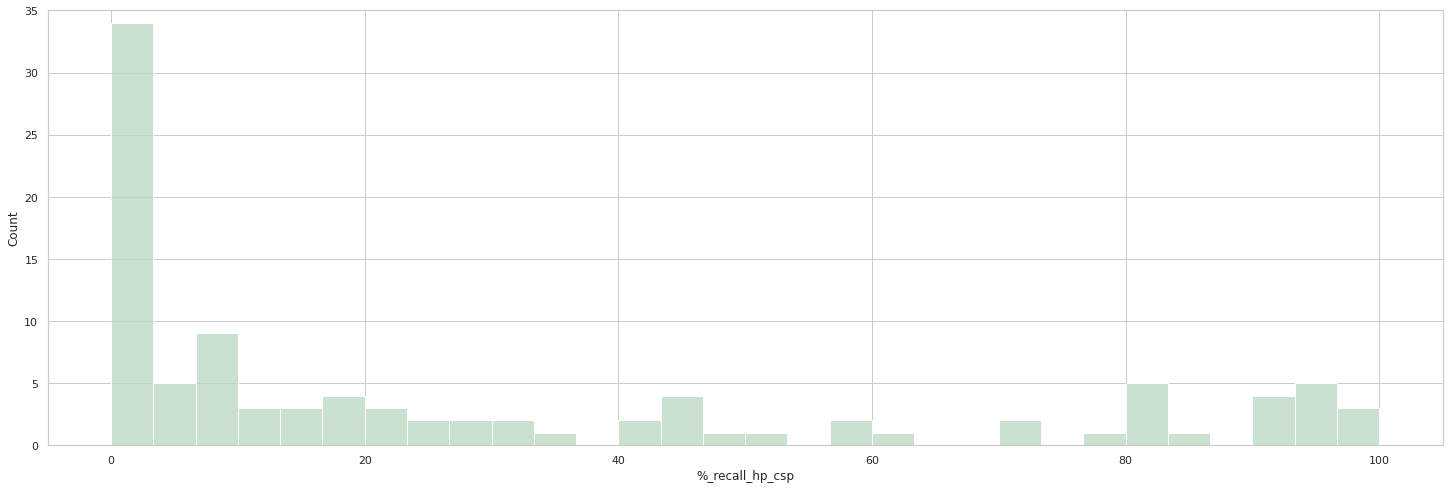

In [131]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
plt.ylim((0,35))
sns.histplot(data=o_df, bins=30, x="%_recall_hp_csp", color='#b8d8be')

<AxesSubplot:xlabel='%_recall_f_csp', ylabel='Count'>

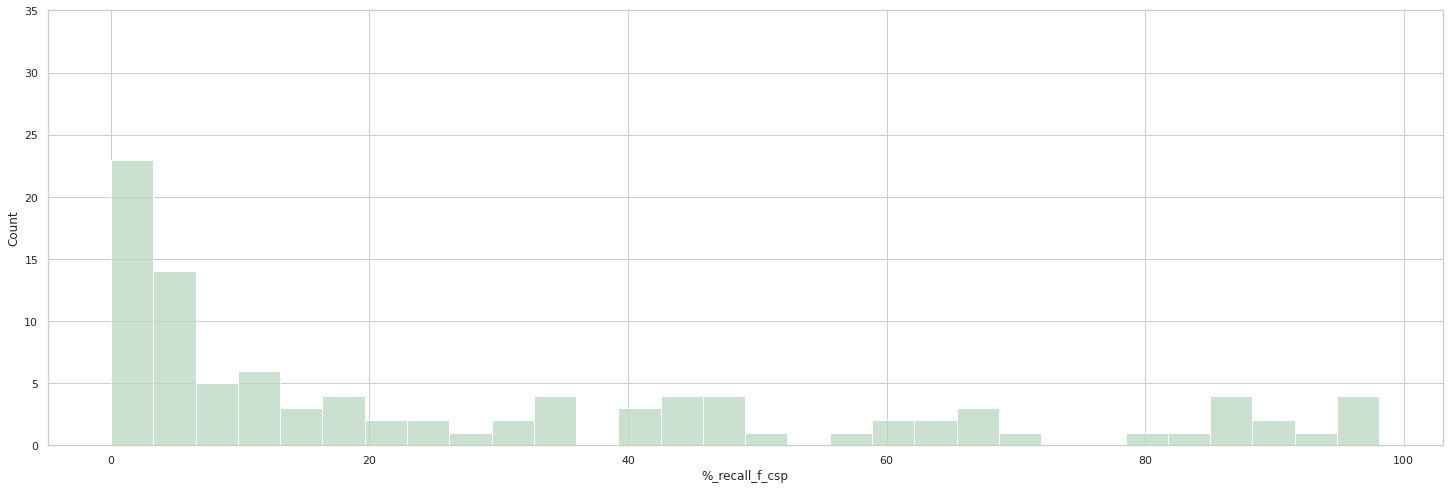

In [132]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
plt.ylim((0,35))
sns.histplot(data=o_df, bins=30, x="%_recall_f_csp", color='#b8d8be')

# Plotting

In [8]:
# Generate df of avg peak sizes by tool
hp_plot_df = df.loc[df['Avg Peak Size, HiChIP-Peaks'] > 0].reset_index(drop=True)
columns = ['Sample Name', 'Avg Peak Size, HiChIP-Peaks']
hp_plot_df = hp_plot_df[columns]
hp_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
hp_plot_df = hp_plot_df.assign(Tool='HiChIP-Peaks')

fi_plot_df = df.loc[df['Avg Peak Size, FitHiChIP'] > 0].reset_index(drop=True)
columns = ['Sample Name', 'Avg Peak Size, FitHiChIP']
fi_plot_df = fi_plot_df[columns]
fi_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
fi_plot_df = fi_plot_df.assign(Tool='FitHiChIP')

ch_plot_df = df.loc[df['Avg Peak Size, Chip-Seq'] > 0].reset_index(drop=True)
columns = ['Sample Name', 'Avg Peak Size, Chip-Seq']
ch_plot_df = ch_plot_df[columns]
ch_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
ch_plot_df = ch_plot_df.assign(Tool='ChIPLine (Chip-Seq)')

plot_df = pd.concat([hp_plot_df, fi_plot_df, ch_plot_df], ignore_index=True)

In [9]:
# Generate df of number of peaks by tool
hp_num_df = df.loc[df['# Peaks, HiChIP-Peaks'] > 0].reset_index(drop=True)
columns = ['Sample Name', '# Peaks, HiChIP-Peaks']
hp_num_df = hp_num_df[columns]
hp_num_df.columns = ['Tool', 'Number of Peaks']
hp_num_df = hp_num_df.assign(Tool='HiChIP-Peaks')

fi_num_df = df.loc[df['# Peaks, FitHiChIP'] > 0].reset_index(drop=True)
columns = ['Sample Name', '# Peaks, FitHiChIP']
fi_num_df = fi_num_df[columns]
fi_num_df.columns = ['Tool', 'Number of Peaks']
fi_num_df = fi_num_df.assign(Tool='FitHiChIP')

ch_num_df = df.loc[df['# Peaks, Chip-Seq'] > 0].reset_index(drop=True)
columns = ['Sample Name', '# Peaks, Chip-Seq']
ch_num_df = ch_num_df[columns]
ch_num_df.columns = ['Tool', 'Number of Peaks']
ch_num_df = ch_num_df.assign(Tool='ChIPLine (Chip-Seq)')

num_df = pd.concat([hp_num_df, fi_num_df, ch_num_df], ignore_index=True)

In [10]:
# concatenate the above two dfs
com_df = num_df.join(plot_df['Average Peak Size (bp)'])
hichip_peaks = com_df.loc[com_df['Tool'] == 'HiChIP-Peaks']
fithichip = com_df.loc[com_df['Tool'] == 'FitHiChIP']
chipseq = com_df.loc[com_df['Tool'] == 'ChIPLine (Chip-Seq)']
com_df

,Tool,Number of Peaks,Average Peak Size (bp)
0,HiChIP-Peaks,968,18837.628099
1,HiChIP-Peaks,1801,29690.376458
2,HiChIP-Peaks,43,21189.976744
3,HiChIP-Peaks,2661,1281.321308
4,HiChIP-Peaks,3468,1323.914360
5,HiChIP-Peaks,823,1086.366950
6,HiChIP-Peaks,2205,1375.680726
7,HiChIP-Peaks,49,2554.061224
8,HiChIP-Peaks,46,1515.434783
9,HiChIP-Peaks,29585,2240.566571


<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

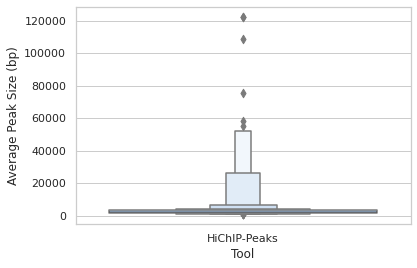

In [11]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=hichip_peaks, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

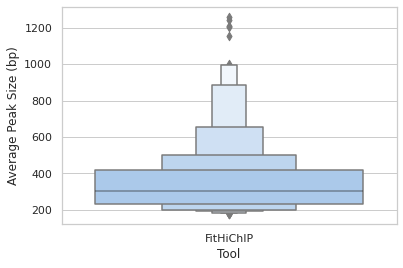

In [12]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=fithichip, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

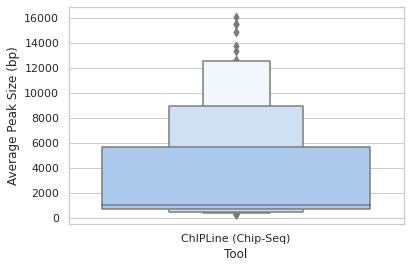

In [13]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=chipseq, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

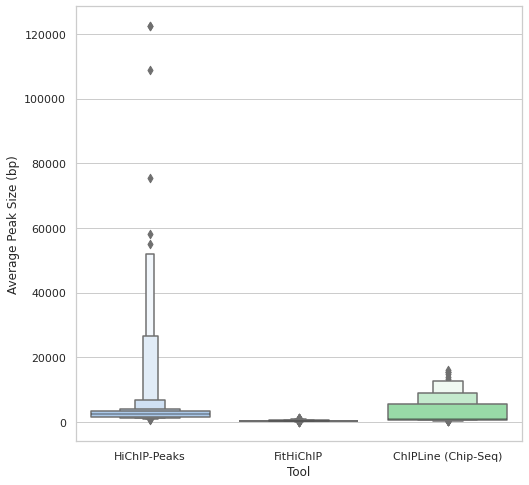

In [14]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=com_df, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Number of Peaks'>

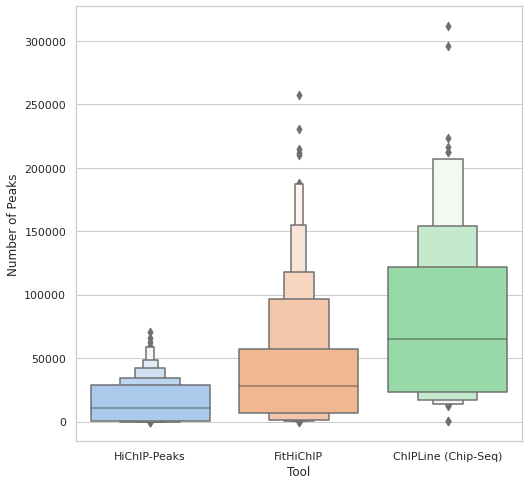

In [15]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
sns.boxenplot(x="Tool", y="Number of Peaks", data=com_df, palette="pastel")

<AxesSubplot:xlabel='Number of Peaks', ylabel='Count'>

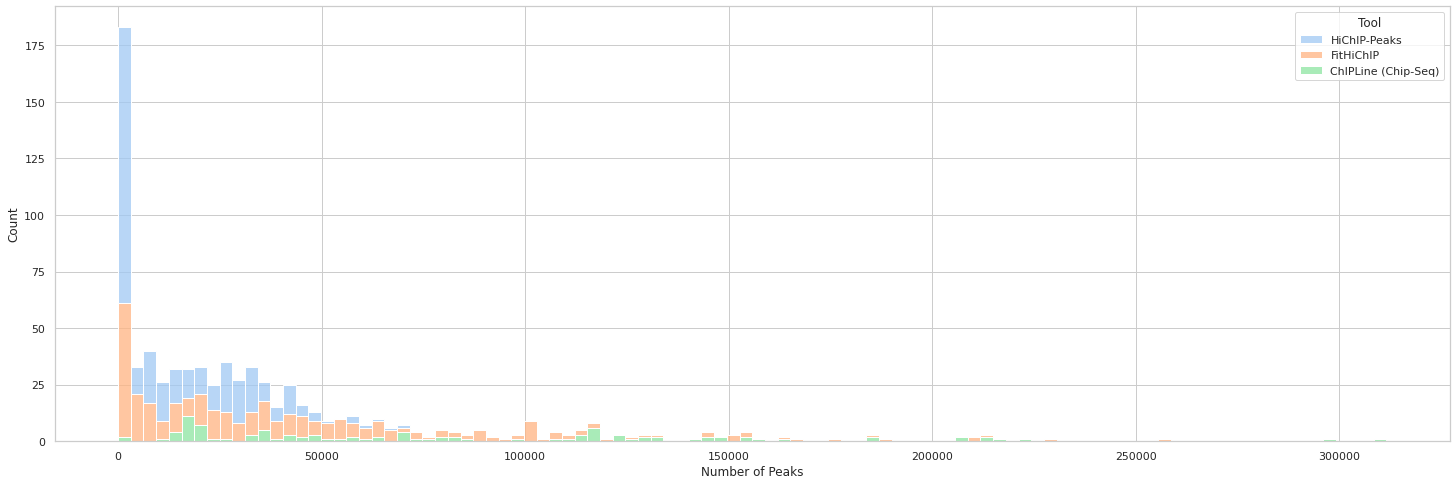

In [16]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=com_df, bins=100, x="Number of Peaks", hue='Tool', multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Number of Peaks', ylabel='Count'>

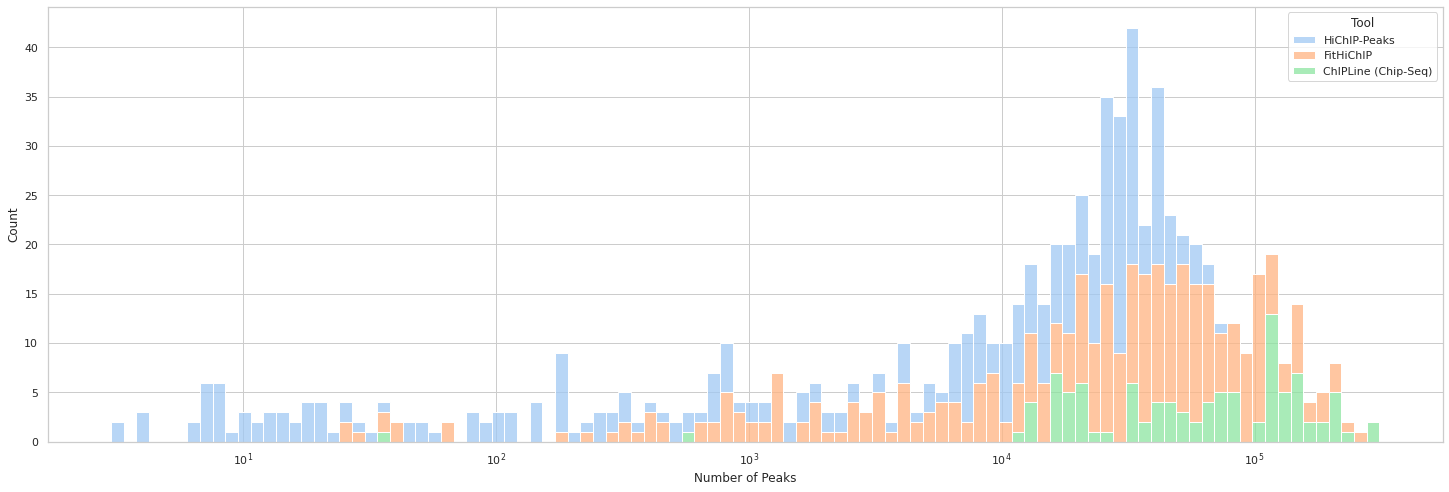

In [17]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=com_df, bins=100, x="Number of Peaks", hue='Tool', log_scale=True, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

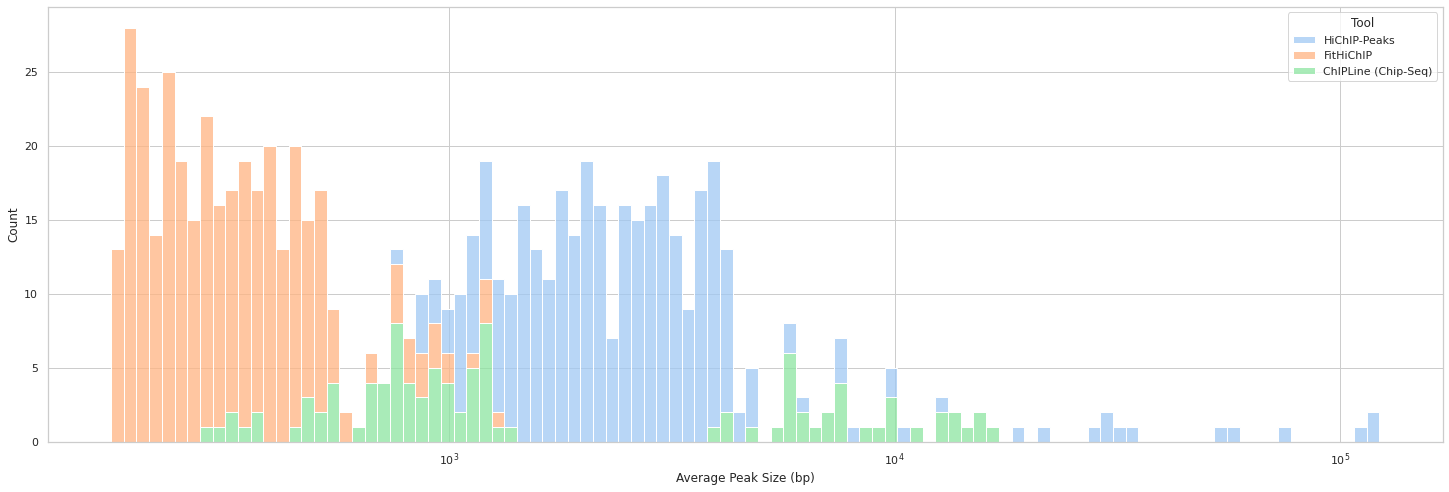

In [18]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=com_df, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=True, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

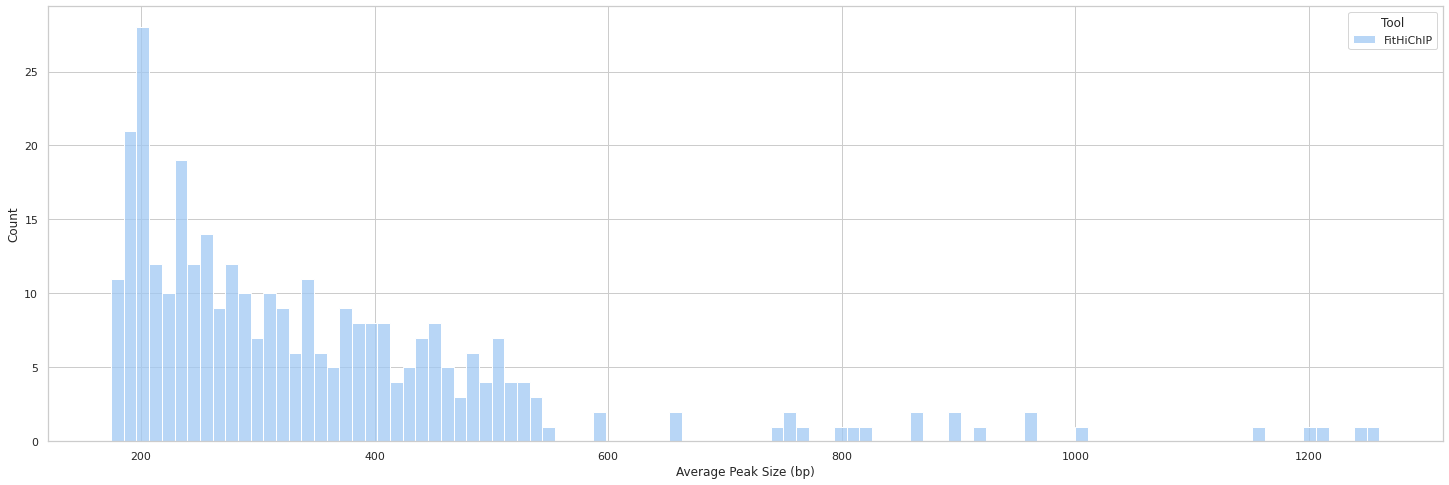

In [20]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=fithichip, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

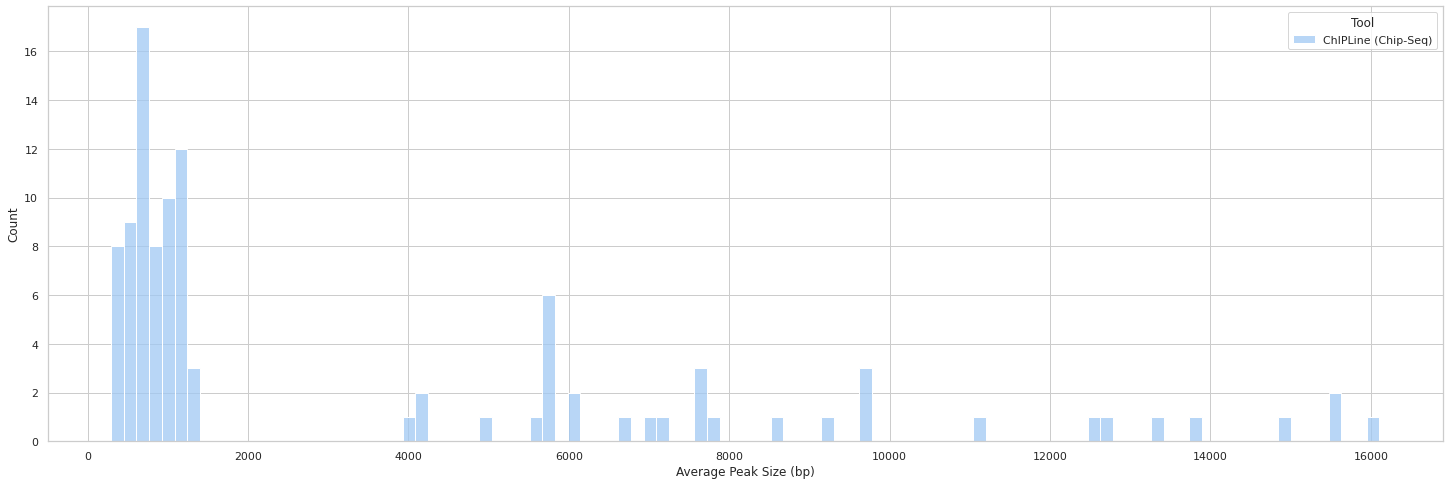

In [21]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=chipseq, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

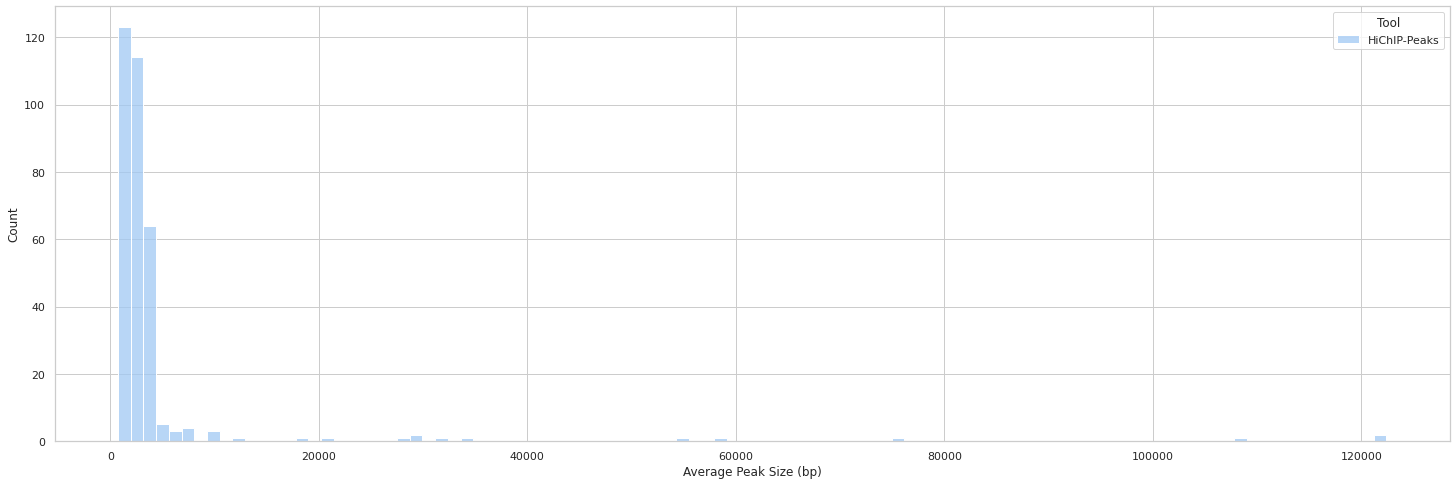

In [22]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=hichip_peaks, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

# Peaks Overlap Analysis

In [8]:
def read_overlap_files(file):
    tot_overlaps = 0
    cshp_overlaps = 0
    csf_overlaps = 0
    chip_w_overlap = []
    chip_w_overlap_no_dups = []
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):     
                info = line.strip().split()
                tot_overlaps = tot_overlaps + 1
                if info[3] == '1' or (len(info) > 11 and info[10] == '1'):
                    cshp_overlaps = cshp_overlaps + 1
                if info[3] == '2' or (len(info) > 11 and info[10] == '2'):
                    csf_overlaps = csf_overlaps + 1
                chip_w_overlap.append(info[0:3])
        for peak in chip_w_overlap:
            if peak not in chip_w_overlap_no_dups:
                chip_w_overlap_no_dups.append(peak)
    return(tot_overlaps, cshp_overlaps, csf_overlaps, chip_w_overlap)

In [11]:
def create_overlaps_df():
    data = []
    glob_str = 'results/peaks/overlaps/no_slop/*'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[4].split('.overlaps')[0]
        sample_info = []
        sample_info.append(sample_name)
        chipseq_file = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet_1.without_header.tsv', sample_name)
        
        ## read overlaps file
        if os.path.exists(file):
            tot_overlaps, cshp_overlaps, csf_overlaps, chip_w_overlap  = read_overlap_files(file)
            chipseq_peaks = read_chipseq_files(chipseq_file)
            tot_chipseq = len(chipseq_peaks)
            
            sample_info.append(tot_overlaps)
            sample_info.append(cshp_overlaps)
            sample_info.append(csf_overlaps)
            sample_info.append(cshp_overlaps / tot_overlaps * 100)
            sample_info.append(csf_overlaps / tot_overlaps * 100)
            
            sample_info.append(tot_chipseq)
            sample_info.append(chip_w_overlap)
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
overlaps_df = create_overlaps_df()
overlaps_df.columns = ['sample_name', '# Overlaps btwn CS and (HP or F)', '# Overlaps btwn CS and HP', '# Overlaps btwn CS and F', '% HP', '% F', 'Total Chip-seq', 'Chip w Overlaps']
overlaps_df = overlaps_df.sort_values(by=['% F'], ascending=False).reset_index(drop=True)
overlaps_df

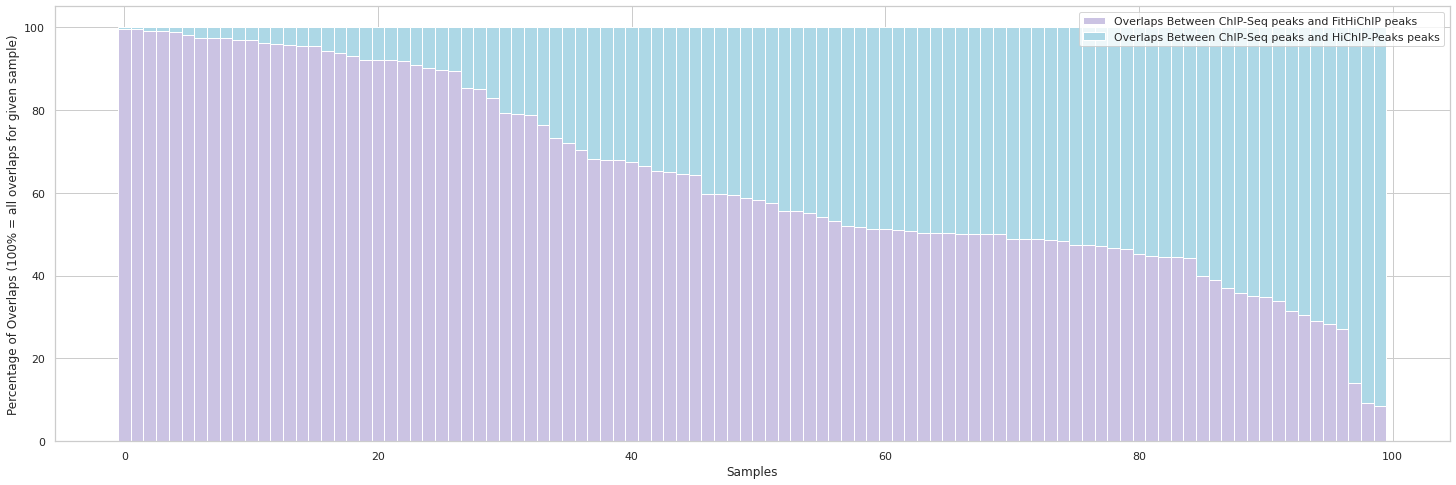

In [114]:
labels = overlaps_df.index
cs_hp = overlaps_df['% HP'].to_list()
cs_f = overlaps_df['% F'].to_list()
width = 1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cs_f, width, label='Overlaps Between ChIP-Seq peaks and FitHiChIP peaks', color='#CBC3E3')
ax.bar(labels, cs_hp, width, bottom=cs_f, label='Overlaps Between ChIP-Seq peaks and HiChIP-Peaks peaks', color='#ADD8E6')

ax.set_ylabel('Percentage of Overlaps (100% = all overlaps for given sample)')
ax.set_xlabel('Samples')
ax.legend()

plt.show()

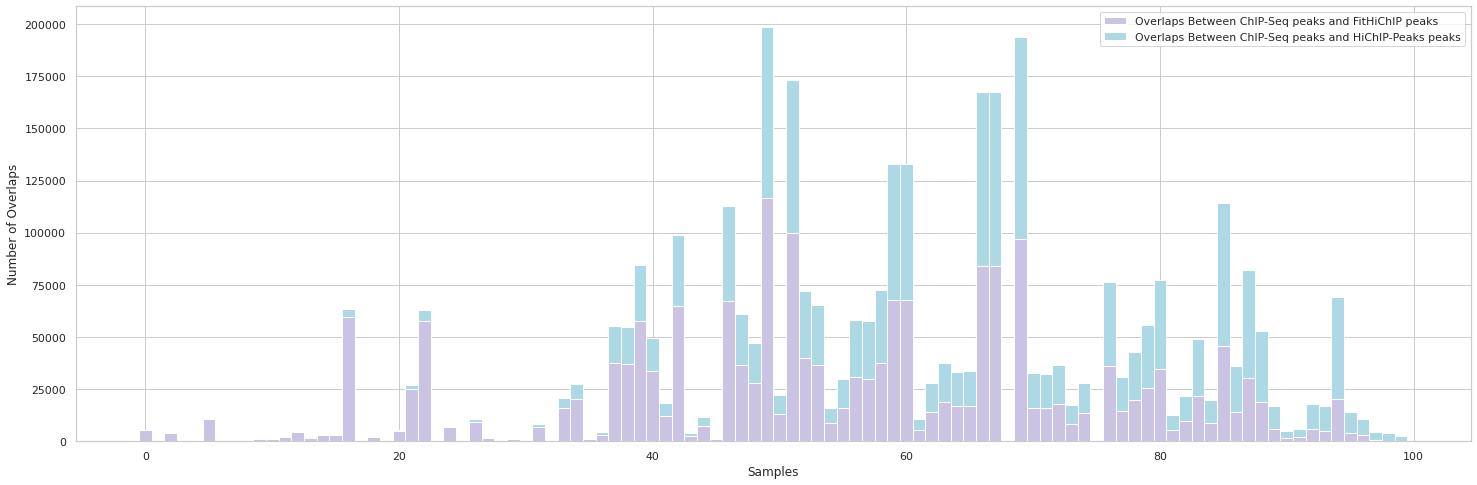

In [115]:
labels = overlaps_df.index
cs_hp = overlaps_df['# Overlaps btwn CS and HP'].to_list()
cs_f = overlaps_df['# Overlaps btwn CS and F'].to_list()
width = 1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cs_f, width, label='Overlaps Between ChIP-Seq peaks and FitHiChIP peaks', color='#CBC3E3')
ax.bar(labels, cs_hp, width, bottom=cs_f, label='Overlaps Between ChIP-Seq peaks and HiChIP-Peaks peaks', color='#ADD8E6')

ax.set_ylabel('Number of Overlaps')
ax.set_xlabel('Samples')
ax.legend()

plt.show()